In [4]:
pip install nltk pandas requests

Note: you may need to restart the kernel to use updated packages.


In [37]:
import requests
import pandas as pd
import nltk
import json
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta

# Download required NLTK data
nltk.download('vader_lexicon')

""" 
Credit for Vader:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
"""

def fetch_news(api_key, symbol='NVDA', days=30):
    """Fetch news articles for the specified symbol."""
    base_url = f'https://newsapi.org/v2/everything?q=NVDA&from=2020-01-01&apiKey={api_key}&language=en'
    
    response = requests.get(base_url)

    # save data to Json file to be converted to PD later 
    with open('news_raw.json', 'w') as json_file:
        json.dump(response.json(), json_file, indent=4)
    
    
    with open('news.json', 'w') as json_file:
        json.dump(response.json()['articles'], json_file, indent=4)
                  
    return response.json()

def analyze_sentiment(articles):
    """Analyze sentiment of news articles."""
    sia = SentimentIntensityAnalyzer()
    
    results = []
    for article in articles['articles']:
        if article['description'] != "None" and article['description'] != "" : 
            sentiment = sia.polarity_scores(f"{article['description']}")
            results.append({
                'date': article['publishedAt'],
                'title': article['title'],
                'description': f"{article['description']}",
                'sentiment_score': sentiment['compound'],
                'positive': sentiment['pos'],
                'negative': sentiment['neg'],
                'neutral': sentiment['neu']
            })

    print(len(articles['articles']))
    
    return pd.DataFrame(results)

def process_news_sentiment(api_key, symbol='NVDA', days=1954):
    """Complete pipeline for news sentiment analysis."""
    # Fetch news
    news_data = fetch_news(api_key, symbol, days)
    
    # Analyze sentiment
    sentiment_df = analyze_sentiment(news_data)
    
    # Add derived metrics
    sentiment_df['absolute_sentiment'] = sentiment_df['sentiment_score'].abs()
    sentiment_df['sentiment_category'] = pd.cut(
        sentiment_df['sentiment_score'],
        bins=[-float('inf'), 0, 0.3, float('inf')],
        labels=['negative', 'neutral', 'positive']
    )
    
    return sentiment_df

# Usage example
api_key = '71849c70a62846ffb1018c530ffb18eb'
sentiment_data = process_news_sentiment(api_key)
print(sentiment_data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/riboldi_jr/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'articles'

In [24]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def fetch_news(api_key, symbol='NVDA', days=1954):
    """Fetch news articles for the specified symbol."""
    base_url = f'https://newsapi.org/v2/everything?q=NVDA&form={datetime.now().strftime('%Y-%m-%d')}&to={(datetime.now() - timedelta(days=days)).strftime('%Y-%m-%d')}&apiKey={api_key}'
    end_date = datetime.now().strftime('%Y-%m-%d')
    start_date = (datetime.now() - timedelta(days=days)).strftime('%Y-%m-%d')
    
    params = {
        'q': symbol,
        'from': start_date,
        'to': end_date,
        'sortBy': 'publishedAt',
        'apiKey': api_key
    }
    
    response = requests.get(base_url)
    
    return response.json()

api_key = '71849c70a62846ffb1018c530ffb18eb'

news = fetch_news(api_key, "NVDA", 30)

In [76]:
import json

with open('news.json', 'w') as json_file:
    json.dump(news['articles'], json_file, indent=4)

news_df = pd.read_json('news.json')
news_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Forbes'}","Catherine Brock, Contributor, \n Catherine Bro...",Is Nvidia Stock Worth Buying The Dip?,Is Nvidia stock’s dip a buy or pass? Analyze g...,https://www.forbes.com/sites/investor-hub/arti...,https://imageio.forbes.com/specials-images/ima...,2025-04-07T20:29:22Z,"Nvidia has continued AI growth, plus opportuni..."
1,"{'id': None, 'name': 'Yahoo Entertainment'}",None,"Buying Opportunities, Including NVDA, Are Star...",None,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-07T15:24:02Z,"If you click 'Accept all', we and our partners..."
2,"{'id': None, 'name': 'MarketWatch'}",Michael Sincere,‘A 50% correction is probable.’ Why this veter...,“To lower inflation and bring mortgage yields ...,https://www.marketwatch.com/story/a-50-correct...,https://s.yimg.com/ny/api/res/1.2/tIzekGoMTilR...,2025-04-07T21:25:00Z,This is a historical crash and a 50% correctio...
3,"{'id': None, 'name': 'Yahoo Entertainment'}",None,"Prominent Investor Buys NVDA, Citing Extremely...",None,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-07T18:19:46Z,"If you click 'Accept all', we and our partners..."
4,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Jim Cramer on NVIDIA (NVDA): “NVIDIA Got The E...,None,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-07T21:04:24Z,"If you click 'Accept all', we and our partners..."
5,"{'id': None, 'name': 'Yahoo Entertainment'}",Larry Ramer,Ives: Investors With Long-Term Horizons Should...,"Speaking on the Schwab Network recently, well-...",https://finance.yahoo.com/news/ives-investors-...,https://s.yimg.com/ny/api/res/1.2/xtlS.VjuHR4p...,2025-04-07T14:33:40Z,"Speaking on the Schwab Network recently, well-..."
6,"{'id': None, 'name': 'CoinDesk'}",Sam Reynolds,BTC Trades Above $79K as Asia Markets Open to ...,"Markets in Hong Kong, Shanghai, and Taipei wer...",https://www.coindesk.com/markets/2025/04/07/bt...,https://cdn.sanity.io/images/s3y3vcno/producti...,2025-04-07T02:30:11Z,"Bitcoin (BTC) traded above $79,000 Monday morn..."
7,"{'id': None, 'name': 'Yahoo Entertainment'}",Mark Henricks,Timing the Bottom: Is It Still a Good Time to ...,Investors may be able to achieve superior retu...,https://finance.yahoo.com/news/timing-bottom-s...,https://media.zenfs.com/en/smartasset_475/3871...,2025-04-07T14:19:54Z,SmartAsset and Yahoo Finance LLC may earn comm...
8,"{'id': None, 'name': 'Yahoo Entertainment'}",None,NVIDIA (NVDA) Downgraded by HSBC as AI GPU Mom...,None,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-07T18:14:55Z,"If you click 'Accept all', we and our partners..."
9,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Jim Cramer Defends NVIDIA Corporation (NVDA): ...,None,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-07T21:09:34Z,"If you click 'Accept all', we and our partners..."


In [33]:
results = analyze_sentiment(fetch_news('71849c70a62846ffb1018c530ffb18eb', 'NVDA', 30))

KeyError: 'articles'

### DATA!!

In [31]:
print('date', "                  " ,'sentiment_score')

for i in range(0, len(results)-1):
    print(results['date'][i], "  " ,results['sentiment_score'][i])

    i+=1

date                    sentiment_score
2025-05-02T17:15:12Z    -0.2023
2025-04-14T15:41:00Z    0.0
2025-04-28T15:56:18Z    0.6486
2025-05-06T16:45:00Z    0.0
2025-04-21T13:48:00Z    0.1779
2025-04-10T16:01:26Z    0.1779
2025-04-21T05:31:15Z    0.34
2025-04-17T15:12:17Z    -0.4404
2025-04-26T13:00:00Z    0.1779
2025-04-16T20:48:24Z    0.0772
2025-04-11T09:45:00Z    0.8126
2025-04-20T11:00:00Z    -0.5789
2025-04-17T19:10:00Z    -0.25
2025-04-08T15:59:00Z    0.34
2025-04-16T18:02:55Z    0.8425
2025-04-20T12:30:15Z    0.4576
2025-04-28T16:03:00Z    0.296
2025-04-07T20:29:22Z    0.5994
2025-04-30T12:27:36Z    -0.3182
2025-04-14T13:52:35Z    0.0
2025-04-17T02:33:58Z    0.0
2025-04-11T20:02:22Z    -0.3612
2025-04-21T16:09:42Z    0.0
2025-04-15T13:36:41Z    0.25
2025-04-24T16:44:28Z    0.0
2025-04-15T17:14:32Z    0.0
2025-05-01T13:55:01Z    -0.5574
2025-05-06T09:08:03Z    0.0
2025-05-07T17:05:08Z    0.0
2025-04-17T17:55:43Z    -0.0516
2025-04-16T19:59:32Z    0.0
2025-05-07T15:41:34Z    0.0
20

In [28]:
analyze_sentiment(fetch_news('71849c70a62846ffb1018c530ffb18eb', 'NVDA', 1954))

0


""


In [45]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-macosx_11_0_arm64.whl size=272140 sha256=4f5f7961beca7d90de0ac06fc4b1223fa2425340de823ebcff393b0f360b247a
  Stored in directory: /Users/riboldi_jr/Library/Caches/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
Note: you may need to restart the kernel to use updated packages.


In [56]:
import yfinance as yf
import pandas as pd

# Specify the ticker symbol for the S&P 500
ticker_symbol = "^GSPC"

# Download the data for the last 5 years
data = yf.download(ticker_symbol, period="5y", interval="1d")

# Display the data
print(data)

# Further analysis can be done with pandas
# For example, calculate the daily return:
# data["daily_return"] = data["Close"].pct_change()
# print(data.head())

data['Close'].tail(10)

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-05-08  2929.800049  2932.159912  2902.879883  2908.830078  4876030000
2020-05-11  2930.189941  2944.250000  2903.439941  2915.459961  4819730000
2020-05-12  2870.120117  2945.820068  2869.590088  2939.500000  5119630000
2020-05-13  2820.000000  2874.139893  2793.149902  2865.860107  6151650000
2020-05-14  2852.500000  2852.800049  2766.639893  2794.540039  5651130000
...                 ...          ...          ...          ...         ...
2025-05-02  5686.669922  5700.700195  5642.279785  5645.879883  4854380000
2025-05-05  5650.379883  5683.379883  5634.479980  5655.319824  4358260000
2025-05-06  5606.910156  5649.580078  5586.040039  5605.870117  4717260000
2025-05-07  5631.279785  5654.729980  5578.640137  5614.180176  4987440000
2025-05-08  5697.700195  

Ticker,^GSPC
Date,
2025-04-25,5525.209961
2025-04-28,5528.750000
2025-04-29,5560.830078
2025-04-30,5569.060059
2025-05-01,5604.140137
2025-05-02,5686.669922
2025-05-05,5650.379883
2025-05-06,5606.910156
2025-05-07,5631.279785



Sentiment Statistics:
count    30.000000
mean      0.462371
std       0.180001
min       0.117344
25%       0.381790
50%       0.453171
75%       0.572067
max       0.815843
Name: sentiment_score, dtype: float64


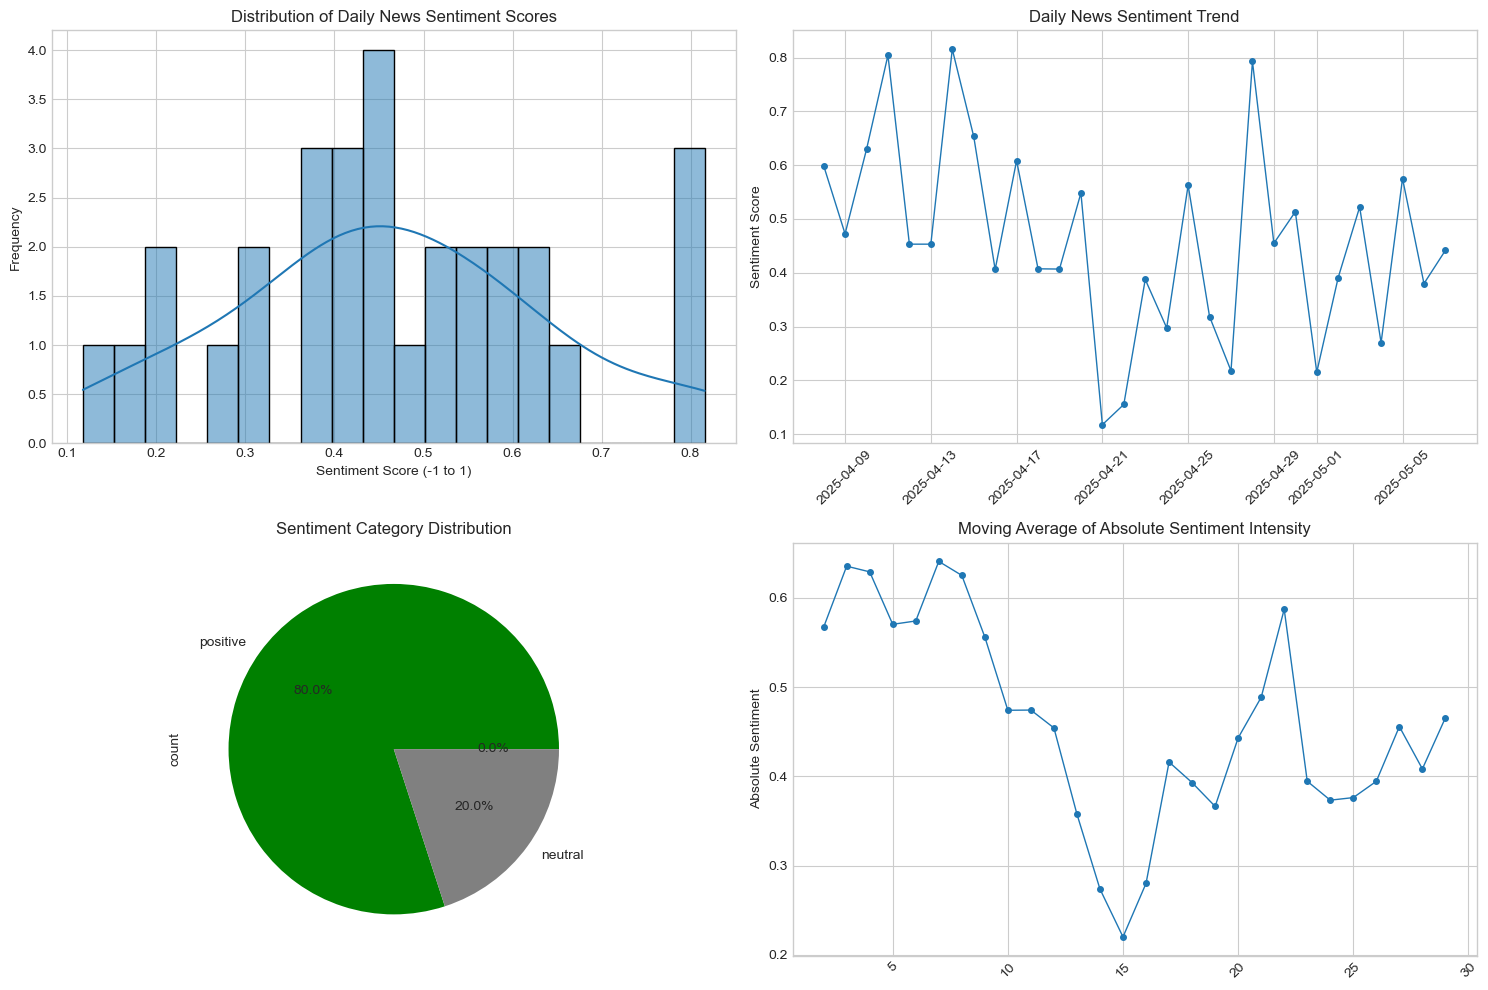


Quantitative Metrics:
Average absolute sentiment intensity: 0.462
Days with positive sentiment: 24/30 (80.0%)
Days with negative sentiment: 0/30 (0.0%)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate simulated news sentiment data for 30 days
dates = pd.date_range(start='2025-04-08', periods=30)
sentiments = np.random.normal(loc=0.5, scale=0.2, size=30)  # Mean 0.5 (slightly positive), std dev 0.2

df = pd.DataFrame({
    'date': dates,
    'sentiment_score': sentiments,
    'absolute_sentiment': np.abs(sentiments),
    'sentiment_category': pd.cut(
        sentiments,
        bins=[-float('inf'), 0, 0.3, float('inf')],
        labels=['negative', 'neutral', 'positive']
    )
})

# Calculate key statistics
stats = df['sentiment_score'].describe()
print("\nSentiment Statistics:")
print(stats)

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(15, 10))

# 1. Sentiment Score Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='sentiment_score', bins=20, kde=True)
plt.title('Distribution of Daily News Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')

# 2. Daily Sentiment Trend
plt.subplot(2, 2, 2)
plt.plot(df['date'], df['sentiment_score'], marker='o', linestyle='-', linewidth=1, markersize=4)
plt.title('Daily News Sentiment Trend')
plt.xticks(rotation=45)
plt.ylabel('Sentiment Score')

# 3. Sentiment Categories
plt.subplot(2, 2, 3)
category_counts = df['sentiment_category'].value_counts()
colors = {'negative': 'red', 'neutral': 'gray', 'positive': 'green'}
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=[colors[c] for c in category_counts.index])
plt.title('Sentiment Category Distribution')

# 4. Absolute Sentiment Intensity
plt.subplot(2, 2, 4)
df['absolute_sentiment'].rolling(window=3).mean().plot(marker='o', linestyle='-', linewidth=1, markersize=4)
plt.title('Moving Average of Absolute Sentiment Intensity')
plt.xticks(rotation=45)
plt.ylabel('Absolute Sentiment')

plt.tight_layout()
plt.show()

# Calculate additional quantitative metrics
print("\nQuantitative Metrics:")
print(f"Average absolute sentiment intensity: {df['absolute_sentiment'].mean():.3f}")
print(f"Days with positive sentiment: {(df['sentiment_category'] == 'positive').sum()}/{len(df)} ({((df['sentiment_category'] == 'positive').sum()/len(df)*100):.1f}%)")
print(f"Days with negative sentiment: {(df['sentiment_category'] == 'negative').sum()}/{len(df)} ({((df['sentiment_category'] == 'negative').sum()/len(df)*100):.1f}%)")